In [1]:
import glob
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from uncertainties import ufloat, unumpy

from lmfit.models import Model, ConstantModel, LinearModel, PolynomialModel, GaussianModel, VoigtModel, LorentzianModel, PseudoVoigtModel, DonaichModel

sns.set_context('talk')

In [2]:
## To use LaTeX and select Helvetica as the default font, without editing matplotlibrc use:
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

#plt.rc('text', usetex=True)
#plt.rc('text.latex', preamble=r'\usepackage{physics}')
#plt.rc('font', family='serif')

In [3]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

params = {'text.latex.preamble':[r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage[]{siunitx}',
                                 r'\usepackage{sfmath}',
                                 r'\sisetup{detect-family=true}']}
plt.rcParams.update(params)

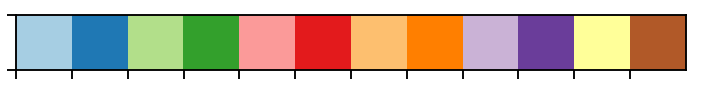

In [4]:
sns.palplot(sns.color_palette("Paired"))

# MCP saturation varying UV power

### Read in UV calibration DAQ voltages

In [5]:
UV_PD_DAQ_data = pd.read_excel(os.path.join('UV_PD_DAQ_check', 'UV_PD_DAQ_check.xlsx'))

### Fitting the UV calibration DAQ voltages to the measured UV power

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 10
    # variables        = 2
    chi-square         = 1.33302305
    reduced chi-square = 0.16662788
    Akaike info crit   = -16.1513576
    Bayesian info crit = -15.5461874
[[Variables]]
    intercept:  0.00599279 +/- 0.24202351 (4038.58%) (init = 0)
    slope:      9.75045228 +/- 0.08331620 (0.85%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(intercept, slope) = -0.846



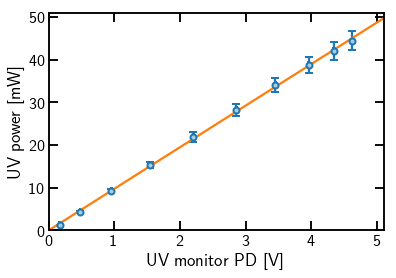

In [6]:
# Set data
x = UV_PD_DAQ_data['UV_Power (avg.) [V]']
xerr = UV_PD_DAQ_data['UV_Power (std.) [V]']
y = UV_PD_DAQ_data['UV_Power (avg.) [mW]']
yerr = UV_PD_DAQ_data['UV_Power (std.) [mW]']

# Specify fit model
fit_model = LinearModel()
fit_params = fit_model.make_params()

# Set initial guesses
fit_params['intercept'].set(0)
fit_params['slope'].set(10)

# Initial guess
xfit = xfit = np.linspace(-1, 10, num=1000, endpoint=True)
yinit = fit_model.eval(fit_params, x=xfit)

# Fitting
fit_result = fit_model.fit(y, fit_params, x=x)
dely = fit_result.eval_uncertainty(x=x)
yfit = fit_model.eval(fit_result.params, x=xfit)
print(fit_result.fit_report())

plt.figure()
# Plot data
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=4, markeredgewidth=2, markersize=6,
             markeredgecolor=sns.color_palette("Paired")[1], markerfacecolor=sns.color_palette("Paired")[0])

# Plot initial guess
#plt.plot(xfit, yinit)

# Plot fitted result
plt.plot(xfit, yfit)

plt.gca().tick_params(direction='in', axis='both', bottom=True, top=True, left=True, right=True)

plt.xlim(0, 5.1)
plt.ylim(0, 51)

plt.xlabel('UV monitor PD [V]')
plt.ylabel('UV power [mW]')
plt.show()

In [7]:
# Save fitted slope and intercept for later use
conversion_slope = ufloat(fit_result.params['slope'].value, fit_result.params['slope'].stderr)
conversion_intercept = ufloat(fit_result.params['intercept'].value, fit_result.params['intercept'].stderr)

## Plotting the fitted peak heights from spectra varying UV power

### Read in the .csv files and fit to extract maximum peak height

In [8]:
spectra_list = glob.glob(os.path.join('vary_uv_power', 'scan_UV_VCA-n33-pol_atomic_line*_out.csv'))

# Read in the individual .csv files and add them to the larger DataFrame
vary_UV_data = pd.DataFrame()
for f in spectra_list:
    temp = pd.read_csv(f)
    temp['Scan'] = f
    
    # Get UV_VCA set point voltage from file name
    temp['UV_VCA [V]'] = float(os.path.basename(f).split('UV_VCA-')[-1].split('_')[0])
    
    temp['Timestamp'] = pd.to_datetime(temp['Timestamp'])
    
    vary_UV_data = pd.concat([vary_UV_data, temp], join='outer', ignore_index=True)

In [9]:
[fig, axs] = plt.subplots(nrows=5, sharex=True, figsize=(9,9))
axs[0].plot(vary_UV_data['Spec_Power'], label=r'Spec_Power')
axs[1].plot(vary_UV_data['numberAtom'], label=r'numberAtom')
axs[2].plot(vary_UV_data['tempXAtom'], label=r'tempXAtom')
axs[3].plot(vary_UV_data['tempYAtom'], label=r'tempYAtom')
axs[4].plot(vary_UV_data['DigiLock_PID1_locked'], label=r'DigiLock_DIO')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
plt.xlabel(r'Timestamp')
plt.show()

RuntimeError: latex was not able to process the following string:
b'Spec_Power'

Here is the full report generated by latex:
latex: warning: running with administrator privileges
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (MiKTeX 2.9.7050 64-bit)
entering extended mode
(C:/Users/reyalp/.matplotlib/tex.cache/baaa6af38d99af91026e63a7abde0f2c.tex
LaTeX2e <2018-12-01>
("C:\Program Files\MiKTeX 2.9\tex/latex/base\article.cls"
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
("C:\Program Files\MiKTeX 2.9\tex/latex/base\size10.clo"))
("C:\Program Files\MiKTeX 2.9\tex/latex/type1cm\type1cm.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/base\textcomp.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/base\ts1enc.def"
("C:\Program Files\MiKTeX 2.9\tex/latex/base\ts1enc.dfu")))
("C:\Program Files\MiKTeX 2.9\tex/latex/base\inputenc.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsmath.sty"
For additional information on amsmath, use the `?' option.
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amstext.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsgen.sty"))
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsbsy.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsopn.sty"))
("C:\Program Files\MiKTeX 2.9\tex/latex/physics\physics.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/l3packages/xparse\xparse.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/l3kernel\expl3.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/l3kernel\expl3-code.tex")
("C:\Program Files\MiKTeX 2.9\tex/latex/l3kernel\l3dvips.def"))))
("C:\Program Files\MiKTeX 2.9\tex/latex/siunitx\siunitx.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/tools\array.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/l3packages/l3keys2e\l3keys2e.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/translator\translator.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/graphics\keyval.sty")))
("C:\Program Files\MiKTeX 2.9\tex/latex/sfmath\sfmath.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/geometry\geometry.sty"
("C:\Program Files\MiKTeX 2.9\tex/generic/oberdiek\ifpdf.sty")
("C:\Program Files\MiKTeX 2.9\tex/generic/oberdiek\ifvtex.sty")
("C:\Program Files\MiKTeX 2.9\tex/generic/ifxetex\ifxetex.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/geometry\geometry.cfg")

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file baaa6af38d99af91026e63a7abde0f2c.aux.
("C:\Program Files\MiKTeX 2.9\tex/latex/base\ts1cmr.fd")
("C:\Program Files\MiKTeX 2.9\tex/latex/translator\translator-basic-dictionary-
English.dict")
("C:\Program Files\MiKTeX 2.9\tex/latex/siunitx\siunitx-abbreviations.cfg")
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.18 ...size{16.500000}{20.625000}{\sffamily Spec_
                                                  Power}
No pages of output.
Transcript written on baaa6af38d99af91026e63a7abde0f2c.log.




<Figure size 648x648 with 5 Axes>

### Weed out 'bad' data points

In [10]:
vary_UV_data = vary_UV_data[vary_UV_data['DigiLock_PID1_locked'] > 4.9]
vary_UV_data = vary_UV_data[(0.6E-6 <= vary_UV_data['tempYAtom']) & (vary_UV_data['tempYAtom'] <= 0.95E-6)]

[fig, axs] = plt.subplots(nrows=4, sharex=True, figsize=(9,9))
axs[0].plot(vary_UV_data['Spec_Power'], label='Spec_Power')
axs[1].plot(vary_UV_data['numberAtom'], label='numberAtom')
axs[2].plot(vary_UV_data['tempXAtom'], label='tempXAtom')
axs[3].plot(vary_UV_data['tempYAtom'], label='tempYAtom')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
plt.xlabel('Timestamp')
plt.show()

RuntimeError: latex was not able to process the following string:
b'Spec_Power'

Here is the full report generated by latex:
latex: warning: running with administrator privileges
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (MiKTeX 2.9.7050 64-bit)
entering extended mode
(C:/Users/reyalp/.matplotlib/tex.cache/baaa6af38d99af91026e63a7abde0f2c.tex
LaTeX2e <2018-12-01>
("C:\Program Files\MiKTeX 2.9\tex/latex/base\article.cls"
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
("C:\Program Files\MiKTeX 2.9\tex/latex/base\size10.clo"))
("C:\Program Files\MiKTeX 2.9\tex/latex/type1cm\type1cm.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/base\textcomp.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/base\ts1enc.def"
("C:\Program Files\MiKTeX 2.9\tex/latex/base\ts1enc.dfu")))
("C:\Program Files\MiKTeX 2.9\tex/latex/base\inputenc.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsmath.sty"
For additional information on amsmath, use the `?' option.
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amstext.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsgen.sty"))
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsbsy.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/amsmath\amsopn.sty"))
("C:\Program Files\MiKTeX 2.9\tex/latex/physics\physics.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/l3packages/xparse\xparse.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/l3kernel\expl3.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/l3kernel\expl3-code.tex")
("C:\Program Files\MiKTeX 2.9\tex/latex/l3kernel\l3dvips.def"))))
("C:\Program Files\MiKTeX 2.9\tex/latex/siunitx\siunitx.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/tools\array.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/l3packages/l3keys2e\l3keys2e.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/translator\translator.sty"
("C:\Program Files\MiKTeX 2.9\tex/latex/graphics\keyval.sty")))
("C:\Program Files\MiKTeX 2.9\tex/latex/sfmath\sfmath.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/geometry\geometry.sty"
("C:\Program Files\MiKTeX 2.9\tex/generic/oberdiek\ifpdf.sty")
("C:\Program Files\MiKTeX 2.9\tex/generic/oberdiek\ifvtex.sty")
("C:\Program Files\MiKTeX 2.9\tex/generic/ifxetex\ifxetex.sty")
("C:\Program Files\MiKTeX 2.9\tex/latex/geometry\geometry.cfg")

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (baaa6af38d99af91026e63a7abde0f2c.aux)
("C:\Program Files\MiKTeX 2.9\tex/latex/base\ts1cmr.fd")
("C:\Program Files\MiKTeX 2.9\tex/latex/translator\translator-basic-dictionary-
English.dict")
("C:\Program Files\MiKTeX 2.9\tex/latex/siunitx\siunitx-abbreviations.cfg")
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.18 ...size{16.500000}{20.625000}{\sffamily Spec_
                                                  Power}
No pages of output.
Transcript written on baaa6af38d99af91026e63a7abde0f2c.log.




<Figure size 648x648 with 4 Axes>

### Fitting each spectra to extract peak heights

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 37
    # variables        = 4
    chi-square         = 162.147347
    reduced chi-square = 4.91355596
    Akaike info crit   = 62.6707396
    Bayesian info crit = 69.1144112
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.37559126 +/- 0.06303077 (16.78%) (init = 0.15)
    mF112_sigma:      0.06875010 +/- 0.00130090 (1.89%) (init = 0.02)
    mF112_center:     1507.66036 +/- 8.7203e-04 (0.00%) (init = 1507.667)
    mF112_amplitude:  25.4874635 +/- 0.54589771 (2.14%) (init = 149.25)
    mF112_fwhm:       0.13750020 +/- 0.00260180 (1.89%) == '2.0000000*mF112_sigma'
    mF112_height:     153.054617 +/- 2.07453116 (1.36%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations are 

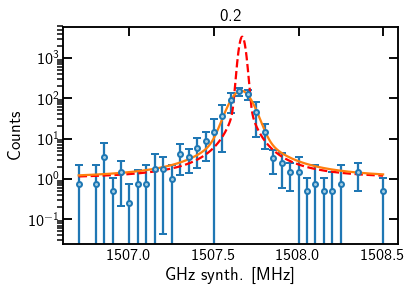

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 37
    # variables        = 4
    chi-square         = 1262.85240
    reduced chi-square = 38.2682546
    Akaike info crit   = 138.617783
    Bayesian info crit = 145.061454
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.27873291 +/- 0.03506809 (12.58%) (init = 0.15)
    mF112_sigma:      0.05631549 +/- 5.4581e-04 (0.97%) (init = 0.02)
    mF112_center:     1507.66616 +/- 3.5103e-04 (0.00%) (init = 1507.667)
    mF112_amplitude:  123.800822 +/- 1.41154003 (1.14%) (init = 874.5)
    mF112_fwhm:       0.11263097 +/- 0.00109162 (0.97%) == '2.0000000*mF112_sigma'
    mF112_height:     939.827382 +/- 6.56774886 (0.70%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations are <

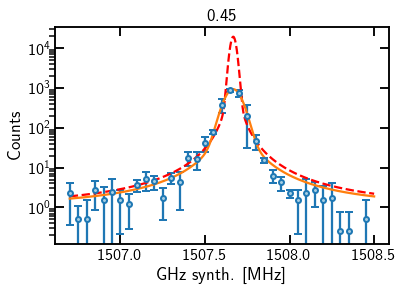

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 37
    # variables        = 4
    chi-square         = 15563.0010
    reduced chi-square = 471.606092
    Akaike info crit   = 231.544148
    Bayesian info crit = 237.987820
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.12764904 +/- 0.06746351 (52.85%) (init = 0.15)
    mF112_sigma:      0.06555784 +/- 0.00104085 (1.59%) (init = 0.02)
    mF112_center:     1507.66676 +/- 6.6693e-04 (0.00%) (init = 1507.667)
    mF112_amplitude:  246.785201 +/- 5.31604254 (2.15%) (init = 1607.25)
    mF112_fwhm:       0.13111567 +/- 0.00208170 (1.59%) == '2.0000000*mF112_sigma'
    mF112_height:     1695.44870 +/- 20.4870122 (1.21%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations are

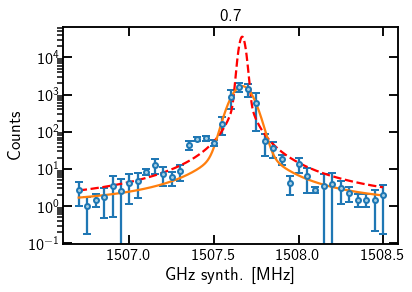

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 385
    # data points      = 37
    # variables        = 4
    chi-square         = 73431.0641
    reduced chi-square = 2225.18376
    Akaike info crit   = 288.947824
    Bayesian info crit = 295.391496
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.42510035 +/- 0.06819306 (16.04%) (init = 0.15)
    mF112_sigma:      0.05392649 +/- 0.00116933 (2.17%) (init = 0.02)
    mF112_center:     1507.68725 +/- 7.5880e-04 (0.00%) (init = 1507.667)
    mF112_amplitude:  448.560039 +/- 10.3612084 (2.31%) (init = 3270.5)
    mF112_fwhm:       0.10785297 +/- 0.00233866 (2.17%) == '2.0000000*mF112_sigma'
    mF112_height:     3371.73707 +/- 51.0478213 (1.51%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations are

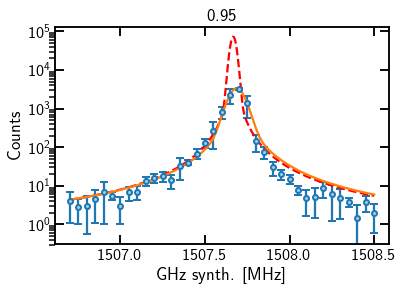

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 198
    # data points      = 37
    # variables        = 4
    chi-square         = 311593.936
    reduced chi-square = 9442.24047
    Akaike info crit   = 342.425914
    Bayesian info crit = 348.869586
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.99999999 +/- 0.14598388 (14.60%) (init = 0.15)
    mF112_sigma:      0.04109016 +/- 0.00301558 (7.34%) (init = 0.02)
    mF112_center:     1507.68794 +/- 0.00148688 (0.00%) (init = 1507.667)
    mF112_amplitude:  680.359223 +/- 18.8171393 (2.77%) (init = 4870.667)
    mF112_fwhm:       0.08218031 +/- 0.00603115 (7.34%) == '2.0000000*mF112_sigma'
    mF112_height:     5270.48532 +/- 787.364059 (14.94%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations 

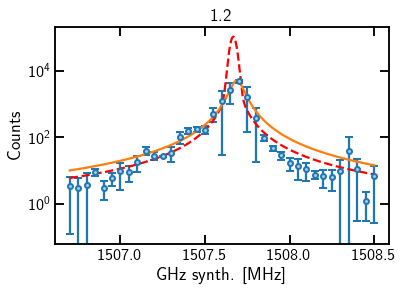

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 37
    # variables        = 4
    chi-square         = 821278.526
    reduced chi-square = 24887.2281
    Akaike info crit   = 378.284888
    Bayesian info crit = 384.728559
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.57770840 +/- 0.08851867 (15.32%) (init = 0.15)
    mF112_sigma:      0.05544247 +/- 0.00176455 (3.18%) (init = 0.02)
    mF112_center:     1507.65691 +/- 0.00123391 (0.00%) (init = 1507.667)
    mF112_amplitude:  1067.34249 +/- 34.3257410 (3.22%) (init = 7400.75)
    mF112_fwhm:       0.11088493 +/- 0.00352910 (3.18%) == '2.0000000*mF112_sigma'
    mF112_height:     7358.80137 +/- 160.763093 (2.18%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations are

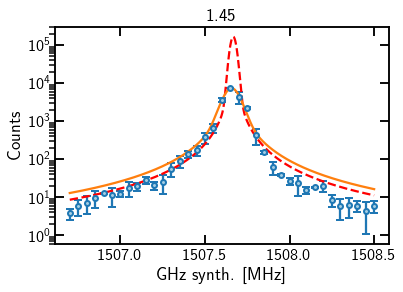

[[Model]]
    (Model(constant, prefix='bg_') + Model(pvoigt, prefix='mF112_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 37
    # variables        = 4
    chi-square         = 974519.505
    reduced chi-square = 29530.8941
    Akaike info crit   = 384.614930
    Bayesian info crit = 391.058602
[[Variables]]
    bg_c:             1 (fixed)
    mF112_fraction:   0.59917457 +/- 0.06970938 (11.63%) (init = 0.15)
    mF112_sigma:      0.05845691 +/- 0.00156379 (2.68%) (init = 0.02)
    mF112_center:     1507.63763 +/- 9.5727e-04 (0.00%) (init = 1507.667)
    mF112_amplitude:  1601.22383 +/- 38.9959157 (2.44%) (init = 10209)
    mF112_fwhm:       0.11691382 +/- 0.00312758 (2.68%) == '2.0000000*mF112_sigma'
    mF112_height:     10381.3425 +/- 182.993316 (1.76%) == '(((1-mF112_fraction)*mF112_amplitude)/(mF112_sigma*sqrt(pi/log(2)))+(mF112_fraction*mF112_amplitude)/(pi*mF112_sigma))'
[[Correlations]] (unreported correlations are <

KeyboardInterrupt: 

In [11]:
def fit_spectra(x, y, yerr, name):
    # Specify fit model
    bg = ConstantModel(prefix='bg_')
    mF112 = PseudoVoigtModel(prefix='mF112_')
    #mF92 = PseudoVoigtModel(prefix='mF92_')
    #mF72 = PseudoVoigtModel(prefix='mF72_')
    #mF52 = GaussianModel(prefix='mF52_')
    #mF32 = GaussianModel(prefix='mF32_')
    
    #fit_model = bg + mF112 + mF92 + mF72 + mF52 + mF32
    fit_model = bg + mF112
    fit_params = fit_model.make_params()
    
    mF112_center = 1507.66680;
    zeeman_shift = 1507.66680  - 1507.41407;
    #mF92_center = mF112_center - 1*zeeman_shift
    #mF72_center = mF112_center - 2*zeeman_shift
    #mF52_center = mF112_center - 3*zeeman_shift
    #mF32_center = mF112_center - 4*zeeman_shift
    
    # Set initial guesses
    #fit_params['bg_c'].set(2, min=0, max=10, vary=False)
    fit_params['bg_c'].set(1, min=0, vary=False)
    
    fit_params['mF112_center'].set(mF112_center, min=mF112_center-zeeman_shift/3, max=mF112_center+zeeman_shift/3, vary=True)
    fit_params['mF112_amplitude'].set(max(y), min=0, vary=True)
    fit_params['mF112_sigma'].set(0.02, min=0.005, vary=True)
    fit_params['mF112_fraction'].set(0.15, vary=True)
    
    #fit_params['mF92_center'].set(mF92_center, min=mF92_center-zeeman_shift/3, max=mF92_center+zeeman_shift/3, vary=True)
    #fit_params['mF92_amplitude'].set(max(y)/1E3, min=0, vary=True)
    #fit_params['mF92_sigma'].set(0.02, min=0.01, max=0.1, vary=True)
    
    #fit_params['mF72_center'].set(mF72_center, min=mF72_center-zeeman_shift/3, max=mF72_center+zeeman_shift/3, vary=True)
    #fit_params['mF72_amplitude'].set(max(y)/1E4, min=0, vary=True)
    #fit_params['mF72_sigma'].set(0.04, min=0.01, max=0.1, vary=True)
    
    #fit_params['mF52_center'].set(mF52_center, min=mF52_center-zeeman_shift/3, max=mF52_center+zeeman_shift/3)
    #fit_params['mF52_amplitude'].set(max(y)/1E4, min=0)
    #fit_params['mF52_sigma'].set(0.04, min=0.01, max=0.1)
    
    #fit_params['mF32_center'].set(mF32_center, min=mF32_center-zeeman_shift/3, max=mF32_center+zeeman_shift/3)
    #fit_params['mF32_amplitude'].set(max(y)/1E4, min=0)
    #fit_params['mF32_sigma'].set(0.04, min=0.01, max=0.1)

    # Initial guess
    xfit = xfit = np.linspace(min(x), max(x), num=1000, endpoint=True)
    yinit = fit_model.eval(fit_params, x=xfit)

    # Fitting
    fit_result = fit_model.fit(y, fit_params, x=x)
    dely = fit_result.eval_uncertainty(x=x)
    yfit = fit_model.eval(fit_result.params, x=xfit)
    
    print(fit_result.fit_report())
    
    # Plot fitted result
    plt.figure()
    
    plt.gca().set_yscale('log')
    
    # Plot data
    plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=4, markeredgewidth=2, markersize=5,
                 markeredgecolor=sns.color_palette("Paired")[1], markerfacecolor=sns.color_palette("Paired")[0])

    # Plot initial guess
    plt.plot(xfit, yinit, '--', color='red')

    # Plot fitted result
    plt.plot(xfit, yfit)
    
    plt.gca().tick_params(direction='in', axis='both', bottom=True, top=True, left=True, right=True)
    plt.title(name)
    
    plt.xlabel('GHz synth. [MHz]')
    plt.ylabel('Counts')
    
    plt.show()
    
    return fit_result

vary_UV_data_fit_results = pd.DataFrame(columns=(('UV_VCA',''),
                                                 ('UV_Power','mean'), ('UV_Power','std'),
                                                 ('Spec_Power','mean'), ('Spec_Power','std'),
                                                 ('height','mean'), ('height', 'std')))


for key, group in vary_UV_data.groupby(by=['UV_VCA [V]'], as_index=False):
    UV_VCA_group = group.groupby(by=['GHz_Synth'], as_index=False).agg({'sfiIntegral':[np.mean, np.std],
                                                                        'UV_Power':[np.mean, np.std],
                                                                        'Spec_Power':[np.mean, np.std],
                                                                        'numberAtom':[np.mean, np.std],
                                                                        'tempXAtom':[np.mean, np.std],
                                                                        'tempYAtom':[np.mean, np.std]})
    
    xdata = UV_VCA_group['GHz_Synth']
    ydata = UV_VCA_group['sfiIntegral','mean']
    yerr = yerr=UV_VCA_group['sfiIntegral','std']
    
    fit_results = fit_spectra(xdata, ydata, yerr, key)
    
    UV_Power_mean = np.mean(UV_VCA_group['UV_Power','mean'])
    UV_Power_std = np.std(UV_VCA_group['UV_Power','mean'])
    Spec_power_mean = np.mean(UV_VCA_group['Spec_Power','mean'])
    Spec_power_std = np.std(UV_VCA_group['Spec_Power','mean'])
    height_mean = fit_results.params['mF112_height'].value
    height_std = fit_results.params['mF112_height'].stderr
    
    temp = pd.DataFrame(data=[[key, UV_Power_mean, UV_Power_std, Spec_power_mean, Spec_power_std, height_mean, height_std]],
                        columns=(('UV_VCA',''),
                                 ('UV_Power','mean'), ('UV_Power','std'),
                                 ('Spec_Power','mean'), ('Spec_Power','std'),
                                 ('height','mean'), ('height', 'std')))
    
    vary_UV_data_fit_results = vary_UV_data_fit_results.append(temp, ignore_index=True)

# To get counts/exposure, divide by 1000 since we used 1000 loops
vary_UV_data_fit_results['counts_per_exposure','mean'] = vary_UV_data_fit_results['height','mean']/1000
vary_UV_data_fit_results['counts_per_exposure','std'] = vary_UV_data_fit_results['height','std']/1000

In [ ]:
# Convert UV_Power DAQ voltage to [mW] using conversion_slope and conversion_intercept

UV_Power_DAQ = unumpy.uarray(vary_UV_data_fit_results['UV_Power','mean'], vary_UV_data_fit_results['UV_Power','std'])
UV_Power_mW = conversion_slope*UV_Power_DAQ + conversion_intercept

vary_UV_data_fit_results['UV_Power_mW','mean'] = unumpy.nominal_values(UV_Power_mW)
vary_UV_data_fit_results['UV_Power_mW','std'] = unumpy.std_devs(UV_Power_mW)

In [ ]:
xdata = vary_UV_data_fit_results['UV_Power_mW','mean']
ydata = vary_UV_data_fit_results['counts_per_exposure','mean']

def mcp_saturation(x, a, b):
    return a*(1 - np.exp(b*(x)))

fit_model = Model(mcp_saturation)
fit_result = fit_model.fit(ydata, x=xdata, a=40, b=-0.1)
dely = fit_result.eval_uncertainty(x=x)
print(fit_result.fit_report())

saturation_a = ufloat(fit_result.params['a'].value, fit_result.params['a'].stderr)
saturation_b = ufloat(fit_result.params['b'].value, fit_result.params['b'].stderr)

In [ ]:
plt.figure(figsize=(8,6))

data_pnts = plt.errorbar(vary_UV_data_fit_results['UV_Power_mW','mean'], vary_UV_data_fit_results['counts_per_exposure','mean'],
                         xerr=vary_UV_data_fit_results['UV_Power_mW','std'], yerr=vary_UV_data_fit_results['counts_per_exposure','std'],
                         capsize=4, fmt='.', label=r'Fitted peak counts', zorder=2)

x = np.linspace(-10,50,1000)
y = -saturation_a.nominal_value*saturation_b.nominal_value*x
linearized_model = plt.plot(x, y, label=r'$-A B x$', zorder=0)

x = np.linspace(-10,50,1000)
y = mcp_saturation(x, saturation_a.nominal_value, saturation_b.nominal_value)
empirical_model = plt.plot(x, y, label=r'$A \qty[1-\exp(B x)]$', zorder=1)

plt.xlabel(r'UV power [mW]')
plt.ylabel(r'Peak counts/exposure')
plt.gca().tick_params(direction='in', axis='both', bottom=True, top=True, left=True, right=True)
plt.xlim(-1, 42)
plt.ylim(-1, 45)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower right', frameon=False)

plt.tight_layout()

#plt.savefig('mcp-counts_vs_uv_power.svg', bbox_inches='tight')
plt.show()

In [ ]:
print(saturation_a)
print(saturation_b)

# MCP saturation varying 689 nm power (constant UV power)

In [ ]:
saturation_a.nominal_value